In [1]:

import numpy as np
import pandas as pd
import os


# mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/My Drive/Data_SIC/'

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Mounted at /content/drive
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_10.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_1.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_3.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_2.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_9.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_7.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_5.JPG
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_6.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_8.jpg
/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_4.jpg
/content/drive/My Drive/Data_SIC/archive/test/bell pepper/Image_4.jpg
/content/drive/My Drive/Data_SIC/archive/test/bell pepper/Image_10.jpg
/content/drive/My Drive/Data_SIC/archive/test/bell pepper/Image_1.jpg
/content/drive/My Drive/Data_SIC/archive/test/bell pepper/Imag

In [4]:
from pathlib import Path
#Tạo danh sách đường dẫn tệp hình ảnh cho tập huấn luyện, kiểm thử, và kiểm tra
train_dir = Path('/content/drive/My Drive/Data_SIC/archive/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/My Drive/Data_SIC/archive/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/drive/My Drive/Data_SIC/archive/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

# Hiển thị số lượng tệp hình ảnh trong mỗi tập dữ liệu
print(f"Số lượng tệp huấn luyện: {len(train_filepaths)}")
print(f"Số lượng tệp kiểm thử: {len(test_filepaths)}")
print(f"Số lượng tệp kiểm tra: {len(val_filepaths)}")

# Hiển thị một số tệp đầu tiên (nếu có) để kiểm tra
print("\nCác tệp huấn luyện đầu tiên:")
print(train_filepaths[:5])  # Hiển thị 5 tệp đầu tiên trong tập huấn luyện

print("\nCác tệp kiểm thử đầu tiên:")
print(test_filepaths[:5])  # Hiển thị 5 tệp đầu tiên trong tập kiểm thử

print("\nCác tệp kiểm tra đầu tiên:")
print(val_filepaths[:5])  # Hiển thị 5 tệp đầu tiên trong tập kiểm tra

Số lượng tệp huấn luyện: 2780
Số lượng tệp kiểm thử: 334
Số lượng tệp kiểm tra: 334

Các tệp huấn luyện đầu tiên:
[PosixPath('/content/drive/My Drive/Data_SIC/archive/train/banana/Image_24.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/train/banana/Image_3.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/train/banana/Image_31.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/train/banana/Image_16.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/train/banana/Image_14.jpg')]

Các tệp kiểm thử đầu tiên:
[PosixPath('/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_10.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_1.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_3.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_2.jpg'), PosixPath('/content/drive/My Drive/Data_SIC/archive/test/cauliflower/Image_9.jpg')]

Các tệp kiểm tra đầu tiên:
[Po

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.17.0


In [6]:
import pandas as pd
import numpy as np

def image_processing(filepath):
    """Tạo một DataFrame với đường dẫn và nhãn của hình ảnh, sau đó xáo trộn nó."""

    if not filepath:
        print("Danh sách filepath trống.")
        return None

    print(f"Đã nhận {len(filepath)} tệp hình ảnh.")

    try:
        # Trích xuất nhãn từ đường dẫn tệp
        labels = [str(path).split("/")[-2] for path in filepath]

        print("Các nhãn đã được tạo:", labels[:10])  # Hiển thị 10 nhãn đầu tiên (nếu có)

        # Chuyển đường dẫn và nhãn thành Series
        filepath_series = pd.Series(filepath, name='Filepath').astype(str)
        labels_series = pd.Series(labels, name='Label')

        # Kết hợp filepaths và labels thành DataFrame
        df = pd.concat([filepath_series, labels_series], axis=1)

        print("DataFrame trước khi xáo trộn:")
        print(df.head())  # In ra 5 hàng đầu tiên của DataFrame

        # Xáo trộn DataFrame
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)

        print("DataFrame sau khi xáo trộn:")
        print(df.head())  # In ra 5 hàng đầu tiên của DataFrame đã xáo trộn

        return df
    except Exception as e:
        print(f"Có lỗi xảy ra trong quá trình xử lý hình ảnh: {e}")
        return None

# Sử dụng hàm
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

# Kiểm tra xem DataFrame có được tạo thành công không
if train_df is not None:
    print('-- Training set --\n')
    print(f'Number of pictures: {train_df.shape[0]}\n')
    print(f'Number of different labels: {len(train_df.Label.unique())}\n')
    print(f'Labels: {train_df.Label.unique()}')
else:
    print("Không thể tạo train_df. Vui lòng kiểm tra lại dữ liệu đầu vào.")

Đã nhận 2780 tệp hình ảnh.
Các nhãn đã được tạo: ['banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana']
DataFrame trước khi xáo trộn:
                                            Filepath   Label
0  /content/drive/My Drive/Data_SIC/archive/train...  banana
1  /content/drive/My Drive/Data_SIC/archive/train...  banana
2  /content/drive/My Drive/Data_SIC/archive/train...  banana
3  /content/drive/My Drive/Data_SIC/archive/train...  banana
4  /content/drive/My Drive/Data_SIC/archive/train...  banana
DataFrame sau khi xáo trộn:
                                            Filepath    Label
0  /content/drive/My Drive/Data_SIC/archive/train...  paprika
1  /content/drive/My Drive/Data_SIC/archive/train...    mango
2  /content/drive/My Drive/Data_SIC/archive/train...  lettuce
3  /content/drive/My Drive/Data_SIC/archive/train...   carrot
4  /content/drive/My Drive/Data_SIC/archive/train...  cabbage
Đã nhận 334 tệp hình ảnh.
Các nhãn đã được tạo: ['caul

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['paprika' 'mango' 'lettuce' 'carrot' 'cabbage' 'pineapple' 'turnip'
 'lemon' 'eggplant' 'apple' 'garlic' 'kiwi' 'capsicum' 'potato' 'pear'
 'cucumber' 'chilli pepper' 'peas' 'corn' 'sweetpotato' 'ginger' 'spinach'
 'sweetcorn' 'jalepeno' 'grapes' 'tomato' 'raddish' 'orange' 'pomegranate'
 'banana' 'bell pepper' 'soy beans' 'watermelon' 'cauliflower' 'onion'
 'beetroot']


In [9]:
train_df.head(5)

,Filepath,Label
0,/content/drive/My Drive/Data_SIC/archive/train...,paprika
1,/content/drive/My Drive/Data_SIC/archive/train...,mango
2,/content/drive/My Drive/Data_SIC/archive/train...,lettuce
3,/content/drive/My Drive/Data_SIC/archive/train...,carrot
4,/content/drive/My Drive/Data_SIC/archive/train...,cabbage


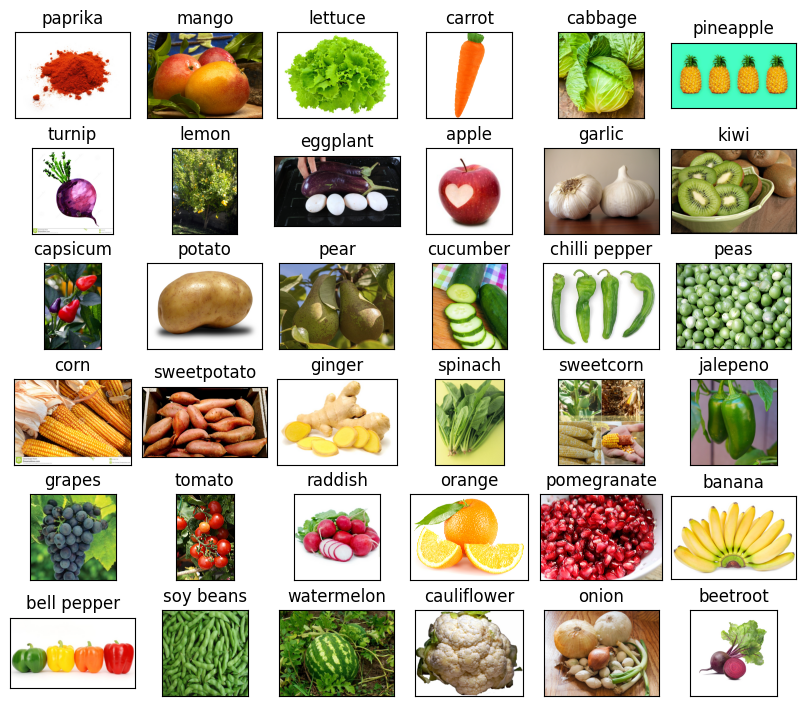

In [10]:
# Tạo một DataFrame chỉ chứa một Nhãn (Label) duy nhất cho mỗi loại
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Hiển thị một số ảnh trong tập dữ liệu
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Đọc ảnh từ đường dẫn trong cột "Đường dẫn" (Filepath)
    anh = plt.imread(df_unique.Filepath[i])
    ax.imshow(anh)

    # Đặt tiêu đề cho biểu đồ con (subplot) với Nhãn tương ứng
    ax.set_title(df_unique.Label[i], fontsize=12)

plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 1253s 13s/step - accuracy: 0.3577 - loss: 2.5712 - val_accuracy: 0.8623 - val_loss: 0.4454
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 126s 988ms/step - accuracy: 0.8232 - loss: 0.5714 - val_accuracy: 0.9042 - val_loss: 0.3214
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 872ms/step - accuracy: 0.8953 - loss: 0.3334 - val_accuracy: 0.9311 - val_loss: 0.2361
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 142s 896ms/step - accuracy: 0.9372 - loss: 0.2106 - val_accuracy: 0.9401 - val_loss: 0.2308
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 82s 887ms/step - accuracy: 0.9615 - loss: 0.1496 - val_accuracy: 0.9641 - val_loss: 0.1586


In [17]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 90s 8s/step


['beetroot',
 'sweetpotato',
 'corn',
 'onion',
 'capsicum',
 'spinach',
 'tomato',
 'kiwi',
 'pomegranate',
 'onion',
 'corn',
 'bell pepper',
 'turnip',
 'mango',
 'potato',
 'lemon',
 'lettuce',
 'ginger',
 'sweetcorn',
 'tomato',
 'lettuce',
 'garlic',
 'turnip',
 'onion',
 'cauliflower',
 'lettuce',
 'pear',
 'watermelon',
 'jalepeno',
 'turnip',
 'grapes',
 'spinach',
 'apple',
 'chilli pepper',
 'tomato',
 'sweetcorn',
 'soy beans',
 'orange',
 'cabbage',
 'mango',
 'banana',
 'cabbage',
 'kiwi',
 'kiwi',
 'lettuce',
 'corn',
 'tomato',
 'cabbage',
 'eggplant',
 'sweetpotato',
 'cucumber',
 'paprika',
 'raddish',
 'bell pepper',
 'eggplant',
 'orange',
 'cauliflower',
 'capsicum',
 'ginger',
 'kiwi',
 'spinach',
 'turnip',
 'tomato',
 'cauliflower',
 'corn',
 'sweetpotato',
 'capsicum',
 'raddish',
 'corn',
 'spinach',
 'capsicum',
 'beetroot',
 'orange',
 'watermelon',
 'pineapple',
 'kiwi',
 'chilli pepper',
 'lettuce',
 'garlic',
 'pineapple',
 'lettuce',
 'garlic',
 'kiwi',


In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res


In [20]:
model.save('FV.keras')

In [21]:
from google.colab import files
files.download('FV.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>